In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


In [2]:
np.random.seed(0)
N = 200
x = np.random.rand(N) * 10 - 5  # [-5,5)
x = np.sort(x)
def f(x):
    return 0.5*np.exp(-(x+3) **2) + np.exp(-x**2) + 0.5*np.exp(-(x-3) ** 2)
y = f(x) + 0.05*np.random.randn(N)
x.shape = -1, 1

In [3]:
print(x)

[[-4.95304524]
 [-4.88285916]
 [-4.81478206]
 [-4.812102  ]
 [-4.80806802]
 [-4.79892454]
 [-4.79781603]
 [-4.6816107 ]
 [-4.60812208]
 [-4.45662012]
 [-4.4197084 ]
 [-4.39774528]
 [-4.35852504]
 [-4.30833005]
 [-4.28963942]
 [-4.128707  ]
 [-4.06059489]
 [-4.03901592]
 [-4.02898724]
 [-3.99773113]
 [-3.97955189]
 [-3.89624859]
 [-3.81725574]
 [-3.81272281]
 [-3.79803439]
 [-3.76180017]
 [-3.71073702]
 [-3.68202138]
 [-3.64525936]
 [-3.61817049]
 [-3.56646713]
 [-3.50551695]
 [-3.41030416]
 [-3.38690482]
 [-3.37507065]
 [-3.35305844]
 [-3.28370323]
 [-3.16808638]
 [-3.13806994]
 [-3.03417638]
 [-3.00003475]
 [-2.91123244]
 [-2.90156251]
 [-2.89617439]
 [-2.76918367]
 [-2.76075312]
 [-2.72585372]
 [-2.62107179]
 [-2.55574408]
 [-2.51246856]
 [-2.46708397]
 [-2.45643518]
 [-2.35444388]
 [-2.34610509]
 [-2.29992027]
 [-2.17193037]
 [-2.10593907]
 [-2.09922393]
 [-2.03859802]
 [-2.02563049]
 [-2.01717674]
 [-1.98425183]
 [-1.88055005]
 [-1.84571649]
 [-1.82016821]
 [-1.81431048]
 [-1.54648

In [4]:
print(y)

[ 0.06735742 -0.03956455 -0.03881036 -0.00314661 -0.00588149  0.11613449
  0.06720746  0.03394854 -0.02361355  0.1021295   0.01661132 -0.00636366
  0.13836753  0.10612395  0.14081156  0.15579456  0.20519031  0.1373223
  0.12172129  0.21885518  0.15136764  0.18945569  0.23361421  0.25916619
  0.24677651  0.21110731  0.26952853  0.20285059  0.3609848   0.26110073
  0.30753716  0.38985907  0.38555996  0.50764628  0.36975296  0.45476844
  0.45938982  0.42771026  0.51677534  0.49093942  0.53871291  0.53745941
  0.60356085  0.56169309  0.45606735  0.46070486  0.5193753   0.46692454
  0.44390908  0.31519045  0.37744055  0.33758775  0.34750466  0.32520517
  0.35683156  0.27666928  0.27598341  0.2109923   0.16685543  0.18950495
  0.20655574  0.21665163  0.28488068  0.16296412  0.11289754  0.14246875
  0.12875732  0.20226649  0.10241159  0.19350665  0.21107989  0.21909815
  0.2444373   0.34125199  0.29353562  0.40469985  0.45739461  0.50853767
  0.5038529   0.60239937  0.67945717  0.52365042  0.

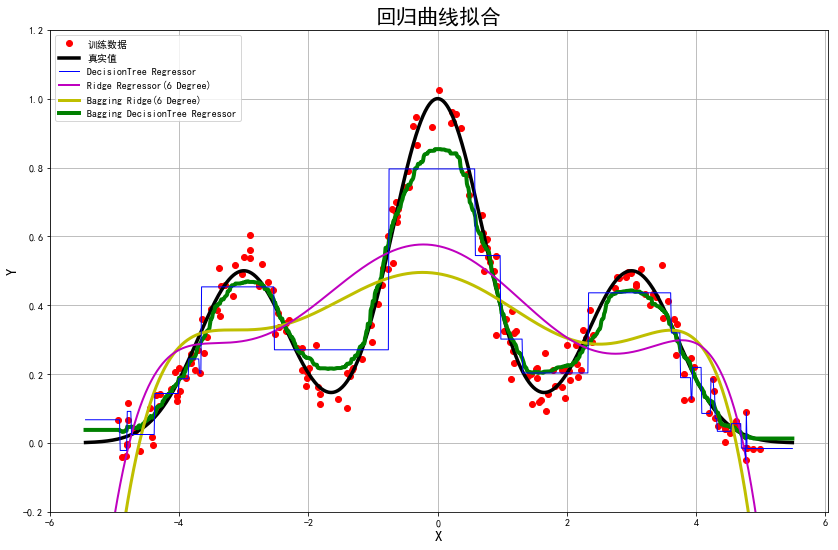

In [5]:
degree = 6
ridge = RidgeCV(alphas=np.logspace(-3, 2, 20), fit_intercept=False)
ridged = Pipeline([('poly', PolynomialFeatures(degree=degree)), ('Ridge', ridge)])
bagging_ridged = BaggingRegressor(ridged, n_estimators=100, max_samples=0.2)
dtr = DecisionTreeRegressor(max_depth=5)
regs = [
    ('DecisionTree Regressor', dtr),
    ('Ridge Regressor(%d Degree)' % degree, ridged),
    ('Bagging Ridge(%d Degree)' % degree, bagging_ridged),
    ('Bagging DecisionTree Regressor', BaggingRegressor(dtr, n_estimators=100, max_samples=0.2))]
x_test = np.linspace(1.1*x.min(), 1.1*x.max(), 1000)
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 8), facecolor='w')
plt.plot(x, y, 'ro', label=u'训练数据')
plt.plot(x_test, f(x_test), color='k', lw=3.5, label=u'真实值')
clrs = 'bmyg'
for i, (name, reg) in enumerate(regs):
    reg.fit(x, y)
    y_test = reg.predict(x_test.reshape(-1, 1))
    plt.plot(x_test, y_test.ravel(), color=clrs[i], lw=i+1, label=name, zorder=6-i)
plt.legend(loc='upper left')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title(u'回归曲线拟合', fontsize=21)
plt.ylim((-0.2, 1.2))
plt.tight_layout(2)
plt.grid(True)
plt.show()
